<a href="https://colab.research.google.com/github/PatchareepornT/bsc_dpdm22/blob/main/Midterm_dpdm22_Group8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## การเตรียมข้อมูลประกอบด้วย กำจัด outlier, แก้ missing, normalization, one-hot-encoder และ อื่นๆ ที่นักศึกษาเห็นว่าเหมาะสม

###Import Data 
- Google sheets
- json file 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import auth #เชื่อม Colab กับ google sheet
import gspread
from google.auth import default
#autenticating to google
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [ ]:
import pandas as pd
#defining my worksheet
gsht = gc.open_by_key('1QO6OiGqyr8i78MVnjyLBBtr5Y8AoBM1tHZRg0Ud5CW4') # import google sheet
worksheet1 = gsht.worksheet("บ้านมือ1")
gsht = gc.open_by_key('1QO6OiGqyr8i78MVnjyLBBtr5Y8AoBM1tHZRg0Ud5CW4')
worksheet2 = gsht.worksheet("บ้านมือ2")
gsht = gc.open_by_key('1A3A-Yl4Tmcq2kPWf37QG6xdRZZ-4XDWULRPfORGPrNQ')
worksheet2 = gsht.worksheet("บ้าน")

rows = worksheethand2.get_all_values()
rows1 = worksheethand1.get_all_values()
rows2 = worksheet2.get_all_values()

#Convert to a DataFrame 
data_h1 = pd.DataFrame(rows1)  #data house
data_h2 = pd.DataFrame(rows)
data_id = pd.DataFrame(rows2) #data ID ผู้ประเมิน

In [ ]:
import json
with open('/content/drive/MyDrive/DPDM/Midterm/7-eleven.json') as json_file1:
  json7 = json.loads(json_file1.read())
with open('/content/drive/MyDrive/DPDM/Midterm/school.json') as json_file12:
  json_school = json.loads(json_file12.read())

# 1 ทำนายราคาบ้าน 10 คะแนน
เตรียมข้อมูลเพื่อทำนายราคาบ้าน ราคาประเมินบ้าน และ คะแนนทรัพย์ จาก [google drive](https://drive.google.com/drive/folders/1uIcUFY1yldIq-A3wijh2n2N6az-EljIe?usp=sharing) โดยข้อมูลที่เตรียมต้องประกอบด้วย columns ต่อไปนี้

* ```'renovate','number_of_rai','number_of_ngan','number_of_va','number_of_story','number_of_bedroom','number_of_bathroom','direction','furniture','usable_area','number_of_parking', 'sell_price'``` จากตาราง "คำตอบนักประเมิน(ID)"

* ```จำนวน 7-11 และ โรงเรียน ในรัศมี 200,500,1000,2000 เมตร (ตั้งชื่อ d200-7/11','d500-7/11',...,'d2000-7/11' แบะ ;d200-school','d500-school',...,'d2000-school')``` จากตาราง "7-eleven.json" และ "school.json"

* ```ประเมินราคาซื้อขาย และ คะแนนทรัพย์ (ตั้งชื่อ 'estimator' และ 'score')``` จากตาราง คำตอบนักประเมิน(ID) โดยราคาประเมินกับคะแนนทรัพย์ อ้างอิงของนักประเมิน ID=01 คนเดียว

##**ตาราง คำตอบนักประเมิน ID , ต่อตาราง บ้านชีท1,2**

### Clean Data คำตอบนักประเมิน ID

In [ ]:
data_id = pd.DataFrame(rows2) #data ID ผู้ประเมิน

In [ ]:
data_id = data_id.rename(columns=data_id.iloc[0]) # row 0 = name -> change to name columns 
data_id = data_id.iloc[1:] # delete row 0 (old row is name)
data_id = data_id.reset_index() # increase columns ['index']
del data_id['index']


In [ ]:
data_id[['เหตุผลไม่มั่นใจราคาประเมิน']]

In [ ]:
data_id.isnull().values.any()

False

In [ ]:
data_id1 = data_id[data_id['ID ผู้ประเมิน']=='1']
data_id1 = data_id1[['ID', 'ID ผู้ประเมิน', 'ประเมินราคาซื้อ-ขาย','ให้คะแนนทรัพย์']]
data_id1.isnull().any()

ID                     False
ID ผู้ประเมิน          False
ประเมินราคาซื้อ-ขาย    False
ให้คะแนนทรัพย์         False
dtype: bool

### Clean Data บ้าน มือ 1, 2

In [ ]:
data_h1 = data_h1.rename(columns=data_h1.iloc[0]) # row 0 = name -> change to name columns 
data_h1 = data_h1.iloc[1:] # delete row 0 (old row is name)
data_h1 = data_h1.reset_index() # increase columns ['index']
del data_h1['index']


In [ ]:
data_h1.isnull().values.any()

False

In [ ]:
data_h1['renovate'] = 'no' # ไม่มี columns renovate เลยสร้าง แล้วเติม no ไว้ก่อน
data_h1['second_hand'] = 'บ้านมือ 1'

In [ ]:
data_h1['number_of_rai'] = 0 # ไม่มีรู้ข้อมูล columns เลยเติม no ไว้ก่อน
data_h1['number_of_ngan'] = 0 # ไม่มีรู้ข้อมูล columns เลยเติม no ไว้ก่อน

In [ ]:
datahome1 = data_h1[['id','renovate','number_of_rai','number_of_ngan','number_of_va','number_of_story','number_of_bedroom','number_of_bathroom','direction','furniture','usable_area','number_of_parking', 'sell_price','second_hand']]
datahome1.head()

,id,renovate,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,number_of_parking,sell_price,second_hand
0,314,no,0,0,50,2,4,3,0,0,185,2,3950000,บ้านมือ 1
1,315,no,0,0,40,2,4,3,0,0,165,2,3250000,บ้านมือ 1
2,316,no,0,0,77.25,2,4,3,0,0,260,2,6300000,บ้านมือ 1
3,317,no,0,0,81.25,2,6,5,0,0,343,3,6900000,บ้านมือ 1
4,318,no,0,0,55,2,4,4,0,0,223,2,4490000,บ้านมือ 1


In [ ]:
data_h1.columns # id, lat,  long

Index(['id', 'parent_id', 'project_name', 'province', 'district',
       'sub_district', 'zip_code', 'zone_id', 'zone', 'property_type',
       ...
       'cable_ask', 'position_previous', 'position_current', 'sold_out_at',
       'is_pro_in_house', 'created_at', 'updated_at', 'deleted_at', 'renovate',
       'second_hand'],
      dtype='object', length=143)

In [ ]:
data_h2 = data_h2.rename(columns=data_h2.iloc[0]) # row 0 = name -> change to name columns 
data_h2 = data_h2.iloc[1:] # delete row 0 (old row is name)
data_h2 = data_h2.reset_index() # increase columns ['index']
del data_h2['index']


In [ ]:
data_h2.isnull().values.any()

False

In [ ]:
data_h2['second_hand'] = 'บ้านมือ 2'

In [ ]:
datahome2 = data_h2[['id','renovate','number_of_rai','number_of_ngan','number_of_va','number_of_story','number_of_bedroom','number_of_bathroom','direction','furniture','usable_area','number_of_parking', 'sell_price','second_hand']]
datahome2.head()

,id,renovate,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,number_of_parking,sell_price,second_hand
0,1,no,0,1,45,2,2,2,ไม่ระบุ,ไม่มี,244,2,390000,บ้านมือ 2
1,4,no,0,0,88,1,1,1,ไม่ระบุ,ไม่มี,164,3,820000,บ้านมือ 2
2,16,no,1,0,8,1,11,11,ไม่ระบุ,ไม่ระบุ,489,9,3260000,บ้านมือ 2
3,18,no,0,0,61.6,2,3,3,ไม่ระบุ,ไม่ระบุ,203,2,5000000,บ้านมือ 2
4,19,no,0,0,72.3,2,3,2,ไม่ระบุ,ไม่ระบุ,164,2,3500000,บ้านมือ 2


### Json file

In [ ]:
seven_id = {}
for t in json7: # t = id
  l = list()
  for x in json7[t]:
    l.append(x['geometry'] ['location'])
    seven_id[t] = l

In [ ]:
school_id = {}
for t in json_school: # t = id
  l = list()
  for x in json_school[t]:
    l.append(x['geometry'] ['location'])
    school_id[t] = l

In [ ]:
school_id['1']

[{'lat': 16.1311875, 'lng': 102.6504375},
 {'lat': 16.1350641, 'lng': 102.6290474},
 {'lat': 16.1482073, 'lng': 102.6207588},
 {'lat': 16.1279195, 'lng': 102.6138295}]

## คอลัมน์ที่จะใช้คำนวณ
- seven_id
- data_h
- school_id

In [ ]:
import geopy.distance
import numpy as np


##บ้านมือ 1

###คำนวณ ระยะทาง เซเว่น กับ บ้านมือ 1

In [ ]:
record_list = []
for id in data_h1['id']: # Main loop วนซ้ำกับคอลัมน์ id ของ data_h1
    thishome1 = data_h1[data_h1['id']==id] #ตรวจสอบว่าค่า id ของ Main loop ตรงกับของ data_h1 ไหม
    h_lat = thishome1['latitude'].values[0]  
    h_lng = thishome1['longitude'].values[0]  
    this_seven = seven_id.get(id, []) # รับค่าของ id ใน dict seven_id หาก id ไม่มีใน dict จะส่งคืนรายการว่าง [] ตามค่าเริ่มต้น
    if this_seven:  # ถ้า this seven id ไม่ใช่ค่าว่าง จะรันโค๊ดคำนวณ ระยะทาง แล้วเพิ่มใน dict ไว้
        seven_dist=[] 
        loc1 = [h_lat,h_lng]
        for seven in this_seven: 
            loc2 = [seven['lat'],seven['lng']] 
            dist = geopy.distance.geodesic(loc1,loc2).m
            seven_dist.append(dist) 
        record_dict ={}
        record_dict['id'] = (id) 
        record_dict['d200-7/11'] = sum(np.array(seven_dist)<200)
        record_dict['d500-7/11'] = sum(np.array(seven_dist)<500)
        record_dict['d1000-7/11'] = sum(np.array(seven_dist)<1000)
        record_dict['d2000-7/11'] = sum(np.array(seven_dist)<2000)
    else: # แต่ถ้า this seven id เป็นค่าว่าง จะเติมระยะทางเป็น 0 แล้วเพิ่มใน dict ไว้
        record_dict ={}
        record_dict['id'] = (id)
        record_dict['d200-7/11'] = 0
        record_dict['d500-7/11'] = 0
        record_dict['d1000-7/11'] = 0
        record_dict['d2000-7/11'] = 0
    record_list.append(record_dict)

Home1_seven = pd.DataFrame(record_list)

In [ ]:
Home1_seven.head()

,id,d200-7/11,d500-7/11,d1000-7/11,d2000-7/11
0,314,0,0,0,0
1,315,0,0,0,0
2,316,0,0,0,0
3,317,0,0,0,0
4,318,0,0,0,0


### คำนวณ ระยะทาง โรงเรียน กับ บ้านมือ 1

In [ ]:
len(school_id)

3500

In [ ]:
record1_list = list() #สร้าง list ว่างไว้รับข้อมูล
for id in data_h1['id']: # Main loop -> id วนลูป รับค่า ใน data_h columns id 
  if id in school_id: # ดูว่าถ้า id ที่ได้จากลูป ตรงกับ เซเว่นไหม 
    thishome1 = data_h1[data_h1['id']==id]  #thishome2 มีแค่ id ที่ตรงกัน กับของเซเว่นและบ้าน
    h_lat = thishome1['latitude'].values[0]  #กำหนดให้เอาแต่ค่า lat,lng ของบ้านหลังปัจจุบัน
    h_lng = thishome1['longitude'].values[0]  
    this_school = school_id.get(id, []) # รับค่าของ id ใน dict seven_id หาก id ไม่มีใน dict จะส่งคืนรายการว่าง [] ตามค่าเริ่มต้น
    school_dist=list() # list ของบ้านปัจจุบันกับเซเว่น
    loc1 = [h_lat,h_lng] #ละติจูดและลองจิจูดของบ้านปัจจุบัน ใช้เป็นตำแหน่ง เริ่มต้น ในการคำนวณระยะทาง
    for school in this_school: #loop ใน วนซ้ำรายการ 7-11 สำหรับบ้านปัจจุบัน
      loc2 = [school['lat'],school['lng']] #ละติจูดและลองจิจูดของร้าน 7-11 ในปัจจุบัน ซึ่งจะใช้เป็นตำแหน่ง สิ้นสุด ในการคำนวณระยะทาง
      dist = geopy.distance.geodesic(loc1,loc2).m
      school_dist.append(dist) 
   
    record_dict ={}#ส่วนนี้ของ loop นอก สร้าง dict 
    record_dict['id'] = (id) #เก็บค่า id จาก home['post_id']
    record_dict['d200-school'] = sum(np.array(school_dist)<200)
    record_dict['d500-school'] = sum(np.array(school_dist)<500)
    record_dict['d1000-school'] = sum(np.array(school_dist)<1000)
    record_dict['d2000-school'] = sum(np.array(school_dist)<2000)
    record1_list.append(record_dict)
  else: # แต่ถ้า this seven id เป็นค่าว่าง จะเติมระยะทางเป็น 0 แล้วเพิ่มใน dict ไว้
    record_dict ={}
    record_dict['id'] = (id)
    record_dict['d200-school'] = 0
    record_dict['d500-school'] = 0
    record_dict['d1000-school'] = 0
    record_dict['d2000-school'] = 0
    record1_list.append(record_dict)

Home1_school = pd.DataFrame(record1_list)

In [ ]:
Home1_school

,id,d200-school,d500-school,d1000-school,d2000-school
0,314,0,0,0,0
1,315,0,0,0,0
2,316,0,0,0,0
3,317,0,0,0,0
4,318,0,0,0,0
...,...,...,...,...,...
749,62204519412ede001495e6cb,0,0,0,0
750,62201e6fa441d30014e1f350,0,0,0,0
751,5fa0e476a3326800191e29ea,0,0,0,0
752,5e9d6fa69f161600121b61b2,0,0,0,0


In [ ]:
home1_dist = datahome1.merge(Home1_seven, left_on='id', right_on='id')
datahome1 = home1_dist.merge(Home1_school, left_on='id', right_on='id')


## บ้านมือ 2

###คำนวณ ระยะทาง เซเว่น กับ บ้านมือ 2

In [ ]:
record_list = list()  #สร้าง list ว่างไว้รับข้อมูล
for id in data_h2['id']:  # Main loop -> id วนลูป รับค่า ใน data_h columns id 
  if id in seven_id: # ดูว่าถ้า id ที่ได้จากลูป ตรงกับ เซเว่นไหม 
    thishome2 = data_h2[data_h2['id']==id]  #thishome2 มีแค่ id ที่ตรงกัน กับของเซเว่นและบ้าน
    h_lat = thishome2['latitude'].values[0]  #กำหนดให้เอาแต่ค่า lat,lng ของบ้านหลังปัจจุบัน
    h_lng = thishome2['longitude'].values[0]  
    this_seven = seven_id[id] #seven ที่ตรงกับ id บ้าน
    seven_dist=list()# list ของบ้านปัจจุบันกับเซเว่น
    loc1 = [h_lat,h_lng] ##ละติจูดและลองจิจูดของบ้านปัจจุบัน ใช้เป็นตำแหน่ง เริ่มต้น ในการคำนวณระยะทาง
    for seven in this_seven: #loop ใน วนซ้ำรายการ 7-11 สำหรับบ้านปัจจุบัน
      loc2 = [seven['lat'],seven['lng']] #ละติจูดและลองจิจูดของร้าน 7-11 ในปัจจุบัน ซึ่งจะใช้เป็นตำแหน่ง สิ้นสุด ในการคำนวณระยะทาง
      dist = geopy.distance.geodesic(loc1,loc2).m
      seven_dist.append(dist) 
   
    record_dict ={}#ส่วนนี้ของ loop นอก สร้าง dict 
    record_dict['id'] = (id) #เก็บค่า id จาก home['post_id']
    record_dict['d200-7/11'] = sum(np.array(seven_dist)<200)
    record_dict['d500-7/11'] = sum(np.array(seven_dist)<500)
    record_dict['d1000-7/11'] = sum(np.array(seven_dist)<1000)
    record_dict['d2000-7/11'] = sum(np.array(seven_dist)<2000)
    record_list.append(record_dict)

  else:
    record_dict ={}
    record_dict['id'] = (id)
    record_dict['d200-7/11'] = 0
    record_dict['d500-7/11'] = 0
    record_dict['d1000-7/11'] = 0
    record_dict['d2000-7/11'] = 0
    record_list.append(record_dict)

Home2_seven = pd.DataFrame(record_list)


In [ ]:
Home2_seven.head()

,id,d200-7/11,d500-7/11,d1000-7/11,d2000-7/11
0,1,0,0,0,0
1,4,0,0,0,0
2,16,0,0,1,2
3,18,0,0,0,4
4,19,0,0,1,4


### คำนวณ ระยะทาง โรงเรียน กับ บ้าน

In [ ]:
record1_list = list() #สร้าง list ว่างไว้รับข้อมูล
for id in data_h2['id']: # Main loop -> id วนลูป รับค่า ใน data_h columns id 
  if id in school_id: # ดูว่าถ้า id ที่ได้จากลูป ตรงกับ เซเว่นไหม 
    thishome2 = data_h2[data_h2['id']==id]  #thishome2 มีแค่ id ที่ตรงกัน กับของเซเว่นและบ้าน
    h_lat = thishome2['latitude'].values[0]  #กำหนดให้เอาแต่ค่า lat,lng ของบ้านหลังปัจจุบัน
    h_lng = thishome2['longitude'].values[0]  
    this_school = school_id[id] #seven ที่ตรงกับ id บ้าน
    school_dist=list() # list ของบ้านปัจจุบันกับเซเว่น
    loc1 = [h_lat,h_lng] #ละติจูดและลองจิจูดของบ้านปัจจุบัน ใช้เป็นตำแหน่ง เริ่มต้น ในการคำนวณระยะทาง
    for school in this_school: #loop ใน วนซ้ำรายการ 7-11 สำหรับบ้านปัจจุบัน
      loc2 = [school['lat'],school['lng']] #ละติจูดและลองจิจูดของร้าน 7-11 ในปัจจุบัน ซึ่งจะใช้เป็นตำแหน่ง สิ้นสุด ในการคำนวณระยะทาง
      dist = geopy.distance.geodesic(loc1,loc2).m
      school_dist.append(dist) 
   
    record_dict ={}#ส่วนนี้ของ loop นอก สร้าง dict 
    record_dict['id'] = (id) #เก็บค่า id จาก home['post_id']
    record_dict['d200-school'] = sum(np.array(school_dist)<200)
    record_dict['d500-school'] = sum(np.array(school_dist)<500)
    record_dict['d1000-school'] = sum(np.array(school_dist)<1000)
    record_dict['d2000-school'] = sum(np.array(school_dist)<2000)
    record1_list.append(record_dict)
  else:
    record_dict ={}
    record_dict['id'] = (id)
    record_dict['d200-7/11'] = 0
    record_dict['d500-7/11'] = 0
    record_dict['d1000-7/11'] = 0
    record_dict['d2000-7/11'] = 0
    record_list.append(record_dict)
Home2_school = pd.DataFrame(record1_list)


In [ ]:
Home2_seven.shape #(1195, 5)

(1656, 5)

In [ ]:
Home2_school.shape #(1472, 5)

(1472, 5)

In [ ]:
datahome2.columns

Index(['id', 'renovate', 'number_of_rai', 'number_of_ngan', 'number_of_va',
       'number_of_story', 'number_of_bedroom', 'number_of_bathroom',
       'direction', 'furniture', 'usable_area', 'number_of_parking',
       'sell_price', 'second_hand'],
      dtype='object')

In [ ]:
Home2_dist = Home2_seven.merge(Home2_school, left_on='id', right_on='id')
datahome2 = datahome2.merge(Home2_dist, left_on='id', right_on='id')


## รวมตาราง Concat 

In [ ]:
datahome1 = datahome1.reset_index(drop=True)

In [ ]:
datahome2 = datahome2.reset_index(drop=True)

In [ ]:
frame = [datahome1, datahome2]
Data = pd.concat(frame)
Data.head() #ยังไม่่ลบคอลัมน์ id

,id,renovate,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,...,sell_price,second_hand,d200-7/11,d500-7/11,d1000-7/11,d2000-7/11,d200-school,d500-school,d1000-school,d2000-school
0,314,no,0,0,50,2,4,3,0,0,...,3950000,บ้านมือ 1,0,0,0,0,0,0,0,0
1,315,no,0,0,40,2,4,3,0,0,...,3250000,บ้านมือ 1,0,0,0,0,0,0,0,0
2,316,no,0,0,77.25,2,4,3,0,0,...,6300000,บ้านมือ 1,0,0,0,0,0,0,0,0
3,317,no,0,0,81.25,2,6,5,0,0,...,6900000,บ้านมือ 1,0,0,0,0,0,0,0,0
4,318,no,0,0,55,2,4,4,0,0,...,4490000,บ้านมือ 1,0,0,0,0,0,0,0,0


In [ ]:
data_id1.isnull().any()

ID                     False
ID ผู้ประเมิน          False
ประเมินราคาซื้อ-ขาย    False
ให้คะแนนทรัพย์         False
dtype: bool

In [ ]:
Datatable = Data.merge(data_id1, left_on='id', right_on='ID')  
Datatable.isnull().values.any()

False

In [ ]:
del Datatable['id']
del Datatable['ID']

###Final table ข้อ 1


In [ ]:
Datatable.columns

Index(['renovate', 'number_of_rai', 'number_of_ngan', 'number_of_va',
       'number_of_story', 'number_of_bedroom', 'number_of_bathroom',
       'direction', 'furniture', 'usable_area', 'number_of_parking',
       'sell_price', 'second_hand', 'd200-7/11', 'd500-7/11', 'd1000-7/11',
       'd2000-7/11', 'd200-school', 'd500-school', 'd1000-school',
       'd2000-school', 'ID ผู้ประเมิน', 'ประเมินราคาซื้อ-ขาย',
       'ให้คะแนนทรัพย์'],
      dtype='object')

In [ ]:
Datatable.head() #1090 rows × 24 columns

,renovate,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,...,d500-7/11,d1000-7/11,d2000-7/11,d200-school,d500-school,d1000-school,d2000-school,ID ผู้ประเมิน,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์
0,no,0,1,45,2,2,2,ไม่ระบุ,ไม่มี,244,...,0,0,0,0,0,1,2,1,"600,000",4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
1,no,0,0,88,1,1,1,ไม่ระบุ,ไม่มี,164,...,0,0,0,0,1,1,4,1,"750,000",3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
2,no,1,0,8,1,11,11,ไม่ระบุ,ไม่ระบุ,489,...,0,1,2,0,0,5,13,1,"2,800,000",2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
3,no,0,0,61.6,2,3,3,ไม่ระบุ,ไม่ระบุ,203,...,0,0,4,0,0,1,8,1,"4,500,000",2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
4,no,0,1,0,2,7,3,ไม่ระบุ,ไม่ระบุ,383,...,1,3,11,0,1,4,10,1,"5,000,000",2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี


# 2 ทำนายสภาพอากาศ 10 คะแนน
เตรียมข้อมูลเพื่อทำนายสภาพอากาศของวันถัดไป โดย 
- กลุ่มที่ 1 และ 9 ทำนาย อุณหภูมิตุ้มแห้ง (Y)
- กลุ่มที่ 2 ทำนาย อุณหภูมิต่ำสุด (Y)
- กลุ่มที่ 3 ทำนาย อุณหภูมิจุดน้ำค้าง (Y)
- กลุ่มที่ 4 ทำนาย จำนวนเมฆ (Y)
- กลุ่มที่ 5 ทำนาย ปริมาณฝน (Y)
- กลุ่มที่ 6 ทำนาย ความชื้นสัมพัทธ์ (Y)
- กลุ่มที่ 7 ทำนาย ความกด (Y)
- กลุ่มที่ 8 ทำนาย ความเร็วลม (Y)

ลักษณะของ data เป็นดังนี้ Xi คือ features อื่นๆที่ใช้ในทำนาย และ Y คือค่าที่ต้องการทำนาย

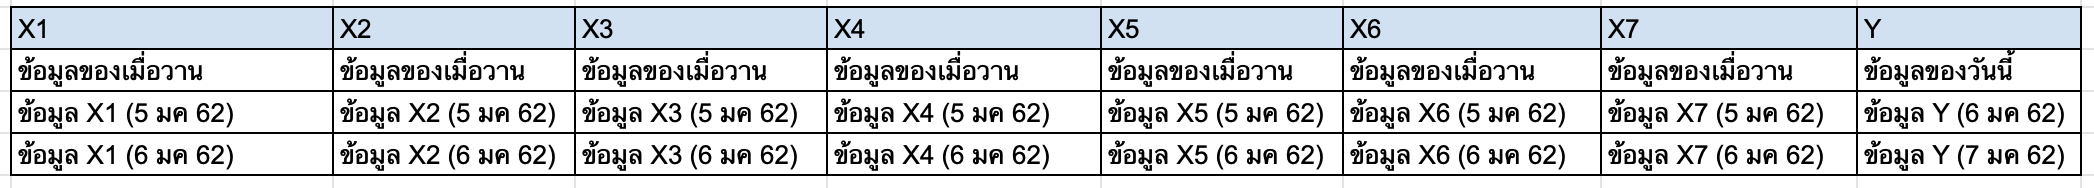



###Clean Data

In [ ]:
import pandas as pd
weather = pd.read_csv('/content/drive/MyDrive/DPDM/Group8.csv')
weather 

,จังหวัด,วันที่,เดือนที่,ปีที่,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตุ้ม,อุณหภูมิต่ำสุด,date
0,ขอนแก่น,1,10,2011,1005.47,83,3,9,1.4,24.2,27.6,24.8,2011-10-01
1,ขอนแก่น,2,10,2011,1006.65,92,2,10,17.7,24.0,25.6,23.0,2011-10-02
2,ขอนแก่น,3,10,2011,1007.49,86,3,10,3,22.9,25.6,22.1,2011-10-03
3,ขอนแก่น,4,10,2011,1008.28,80,2,8,0,21.9,25.8,22.8,2011-10-04
4,ขอนแก่น,5,10,2011,1009.88,86,2,10,2.2,21.7,24.3,23.1,2011-10-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8164,เลย,24,2,2021,1008.39,69,1,0,0,18.4,26.8,18.0,2021-02-24
8165,เลย,25,2,2021,1006.05,61,1,0,0,17.3,27.8,19.5,2021-02-25
8166,เลย,26,2,2021,1004.86,55,2,0,0,13.0,26.3,16.0,2021-02-26
8167,เลย,27,2,2021,1005.76,56,1,2,0,13.8,25.2,15.3,2021-02-27


In [ ]:
features = weather[['อุณหภูมิตุ้ม','อุณหภูมิต่ำสุด','อุณหภูมิจุดน้ำค้าง','จำนวนเมฆ','ปริมาณฝน','ความชื้นสัมพัทธ์','ความเร็วลม','ความกด']]
features

,อุณหภูมิตุ้ม,อุณหภูมิต่ำสุด,อุณหภูมิจุดน้ำค้าง,จำนวนเมฆ,ปริมาณฝน,ความชื้นสัมพัทธ์,ความเร็วลม,ความกด
0,27.6,24.8,24.2,9,1.4,83,3,1005.47
1,25.6,23.0,24.0,10,17.7,92,2,1006.65
2,25.6,22.1,22.9,10,3,86,3,1007.49
3,25.8,22.8,21.9,8,0,80,2,1008.28
4,24.3,23.1,21.7,10,2.2,86,2,1009.88
...,...,...,...,...,...,...,...,...
8164,26.8,18.0,18.4,0,0,69,1,1008.39
8165,27.8,19.5,17.3,0,0,61,1,1006.05
8166,26.3,16.0,13.0,0,0,55,2,1004.86
8167,25.2,15.3,13.8,2,0,56,1,1005.76


In [ ]:
data_features_d = features[features.eq('-').any(1)==False]
data_features_d = data_features_d[data_features_d.eq('T').any(1)==False]

In [ ]:
data_features_d['ความเร็วลม'] = data_features_d['ความเร็วลม'].astype(float)
data_features_d['จำนวนเมฆ'] = data_features_d['จำนวนเมฆ'].astype(float)
data_features_d['ปริมาณฝน'] = data_features_d['ปริมาณฝน'].astype(float)
data_features_d['อุณหภูมิต่ำสุด'] = data_features_d['อุณหภูมิต่ำสุด'].astype(float)

In [ ]:
data_features_d.dtypes

อุณหภูมิตุ้ม          float64
อุณหภูมิต่ำสุด        float64
อุณหภูมิจุดน้ำค้าง    float64
จำนวนเมฆ              float64
ปริมาณฝน              float64
ความชื้นสัมพัทธ์        int64
ความเร็วลม            float64
ความกด                float64
dtype: object

## Visuallization

In [ ]:
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['figure.figsize']=[10,6]

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3603 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3627 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3616 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3641 missing from current font.
  font.set_text(s

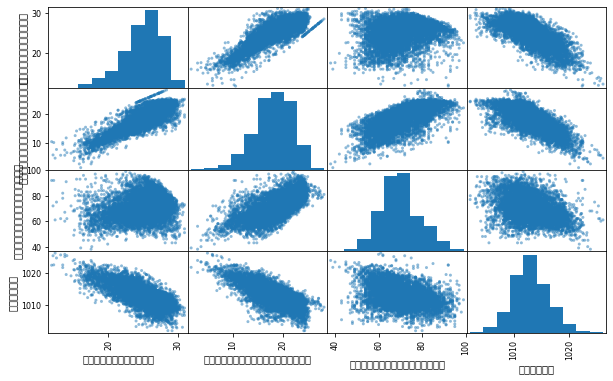

In [ ]:
pd.plotting.scatter_matrix(features);

##Normalization

In [ ]:
from sklearn import preprocessing

In [ ]:
#define
scaler = preprocessing.StandardScaler() #ใช้เพื่อสร้างมาตรฐานให้กับข้อมูลดาต้าเรน
#train
scaler.fit(data_features_d) #คำนวณค่าเฉลี่ยและส่วนเบี่ยงเบนมาตรฐานของข้อมูล ซึ่งจะใช้ในการกำหนดมาตรฐานข้อมูลในขั้นตอนถัดไป
#predict-transform
data_features_d_s = scaler.transform(data_features_d) #ใช้ค่าเฉลี่ยและส่วนเบี่ยงเบนมาตรฐานที่คำนวณในขั้นตอนก่อนหน้า เพื่อสร้างมาตรฐานให้กับข้อมูล

In [ ]:
data_features_d_s

array([[-2.29910857,  1.33170074,  2.28184617, ...,  0.95480871,
        -0.02291572, -0.23529186],
       [-1.92549238,  2.28581221,  2.68279133, ...,  0.21958617,
         2.36850273,  0.59149758],
       [-1.65952832,  1.64973789,  2.68279133, ...,  0.21958617,
         0.21182474, -0.23529186],
       ...,
       [-2.49224914, -1.63664607, -1.32666027, ...,  0.47691406,
        -0.22831362, -1.06208129],
       [-2.20728764, -1.53063368, -0.52476995, ...,  0.07254167,
        -0.22831362, -1.06208129],
       [-1.43155912, -1.31860891, -0.92571511, ...,  0.21958617,
        -0.22831362,         nan]])

###Min-max normalization

In [ ]:
#define
scaler = preprocessing.MinMaxScaler()
#train
scaler.fit(data_features_d)
#predict-transform
data_features_d_norm = scaler.transform(data_features_d)

In [ ]:
data_features_d_norm 

array([[0.14256027, 0.73770492, 0.9       , ..., 0.82291667, 0.01245552,
        0.2       ],
       [0.19160432, 0.8852459 , 1.        , ..., 0.71875   , 0.15747331,
        0.3       ],
       [0.22651704, 0.78688525, 1.        , ..., 0.71875   , 0.02669039,
        0.2       ],
       ...,
       [0.11720698, 0.27868852, 0.        , ..., 0.75520833, 0.        ,
        0.1       ],
       [0.15461347, 0.29508197, 0.2       , ..., 0.69791667, 0.        ,
        0.1       ],
       [0.25644223, 0.32786885, 0.1       , ..., 0.71875   , 0.        ,
               nan]])

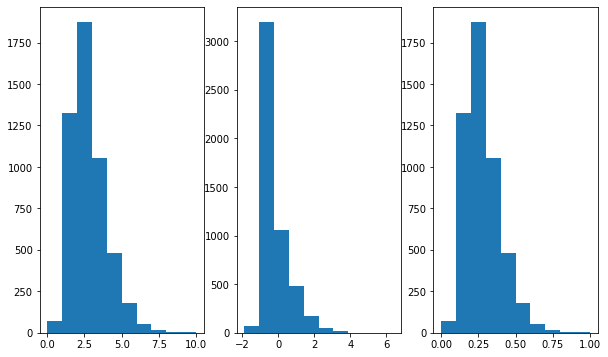

In [ ]:
plt.subplot(1,3,1)
plt.hist(data_features_d['ความเร็วลม'])
plt.subplot(1,3,2)
plt.hist(data_features_d_s[:,7])
plt.subplot(1,3,3)
plt.hist(data_features_d_norm[:,7]);

- การกระจายของค่าก่อนและหลังการทำ Standardize, MinMaxscalar
พบการแจกแจงแบบเบ้ขวาและหลังจากการทำให้ Standardize  
- ข้อมูลกราฟที่ 2 ความเร็วลม หลังทำ Standardize จะพบข้อมูลส่วนมากอยู่ในช่วง -2 ถึง 2  = มีค่าเบี่ยงเบนมาตรฐานต่ำกว่าค่าเฉลี่ยของการกระจาย 
- ข้อมูลกราฟที่ 3 ความเร็วลม หลังทำ MinMaxscalar จะพบข้อมูลส่วนมากอยู่ในช่วง 0.25  หมายถึง ตำแหน่งสัมพัทธ์ของแต่ละค่าข้อมูลค่อนข้างเล็ก

# Final Table

In [ ]:
data_features_d = data_features_d[['ความกด', 'ความชื้นสัมพัทธ์', 'จำนวนเมฆ',
       'ปริมาณฝน', 'อุณหภูมิจุดน้ำค้าง','อุณหภูมิตุ้ม','ปริมาณฝน','ความเร็วลม']]

In [ ]:
data_features_d['ความเร็วลม'] = data_features_d['ความเร็วลม'].shift(-1)
data_features_d

,ความกด,ความชื้นสัมพัทธ์,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตุ้ม,ปริมาณฝน,ความเร็วลม
0,1005.47,83,9.0,1.4,24.2,27.6,1.4,2.0
1,1006.65,92,10.0,17.7,24.0,25.6,17.7,3.0
2,1007.49,86,10.0,3.0,22.9,25.6,3.0,2.0
3,1008.28,80,8.0,0.0,21.9,25.8,0.0,2.0
4,1009.88,86,10.0,2.2,21.7,24.3,2.2,3.0
...,...,...,...,...,...,...,...,...
8164,1008.39,69,0.0,0.0,18.4,26.8,0.0,1.0
8165,1006.05,61,0.0,0.0,17.3,27.8,0.0,2.0
8166,1004.86,55,0.0,0.0,13.0,26.3,0.0,1.0
8167,1005.76,56,2.0,0.0,13.8,25.2,0.0,1.0
